## PHASE 1 - EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/home/ubuntu/ML/customer_churn_dataset.csv")

In [2]:
df.isna().sum()

CustomerID                   0
Gender                       0
Age                          0
SubscriptionType             0
MonthlySpend                 0
TotalWatchTime               0
ComplaintCount               0
DaysSinceLastLogin           0
Churn                        0
AvgSessionDuration           0
NumDevicesUsed               0
ContentPreferenceScore    1000
ActiveDaysLastMonth          0
BingeWatchRatio           1000
SkippedContentCount          0
DiscountReceived             0
LoyaltyScore                 0
PlatformType                 0
AdInteractionCount        1000
ReferredFriendsCount         0
SocialMediaMentions          0
dtype: int64

In [3]:
df['Churn'].value_counts()

0    8028
1    1972
Name: Churn, dtype: int64

In [4]:
df.head()

,CustomerID,Gender,Age,SubscriptionType,MonthlySpend,TotalWatchTime,ComplaintCount,DaysSinceLastLogin,Churn,AvgSessionDuration,...,ContentPreferenceScore,ActiveDaysLastMonth,BingeWatchRatio,SkippedContentCount,DiscountReceived,LoyaltyScore,PlatformType,AdInteractionCount,ReferredFriendsCount,SocialMediaMentions
0,1,Male,68,Basic,11.35,27,2,57,0,208.32,...,33.0,5,5.40,3,3.16,9.850000,Mobile,18.0,2,9
1,2,Female,57,Standard,30.87,15,0,48,1,289.54,...,62.0,26,0.58,9,5.73,8.290000,TV,5.0,0,18
2,3,Male,24,Basic,32.16,0,1,34,1,194.16,...,NaN,9,0.00,2,18.09,-1.772388,Mobile,33.0,1,16
3,4,Male,49,Standard,35.91,21,0,35,0,245.60,...,90.0,2,10.50,4,19.78,2.380000,Mobile,10.0,8,16
4,5,Male,65,Standard,22.71,0,2,4,0,271.02,...,42.0,15,NaN,12,15.41,4.370000,Mobile,2.0,4,8


Looks like the data has 3 columns 1000 missing values each and the Dv is highly imbalanced. we can analyse the column and see how we can handle these.

In [5]:
def churn_counts_by_feature(column):
    churn_counts = df.groupby([column, 'Churn']).size().unstack(fill_value=0)
    churn_counts.columns = ['Not Churned', 'Churned']
    churn_counts['Total'] = churn_counts.sum(axis=1)
    churn_counts['Churn Rate (%)'] = (churn_counts['Churned'] / churn_counts['Total']) * 100
    churn_counts = churn_counts.sort_values(by='Churn Rate (%)', ascending=False)

    return churn_counts

In [9]:
def plot_distribution_by_churn(dataframe,feature, show=True):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(
        data=dataframe,
        x=feature,
        bins=30,
        kde=True,
        hue='Churn',
        multiple='stack',
        ax=ax
    )
    ax.set_title(f'{feature} Distribution by Churn Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

    if show:
        plt.show()
    
    return fig, ax


In [10]:
def plot_boxplot_by_churn(dataframe,feature, show=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=dataframe, x='Churn', y=feature, ax=ax)
    ax.set_title(f'{feature} Distribution by Churn Status (Boxplot)')
    ax.set_xlabel('Churn')
    ax.set_ylabel(feature)

    if show:
        plt.show()
    
    return fig, ax


### Gender

In [6]:
df['Gender'].value_counts()

Male      5013
Female    4987
Name: Gender, dtype: int64

In [7]:
print(churn_counts_by_feature('Gender'))

        Not Churned  Churned  Total  Churn Rate (%)
Gender                                             
Male           4014      999   5013       19.928187
Female         4014      973   4987       19.510728


#### Observations

Gender is nearly perfectly balanced.<br>
Churn rate is very similar between males (19.93%) and females (19.51%).<br>
This suggests gender is likely not a strong predictor of churn.

### Age

In [9]:
df['Age'].describe()

count    10000.000000
mean        43.316500
std         14.942043
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: Age, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


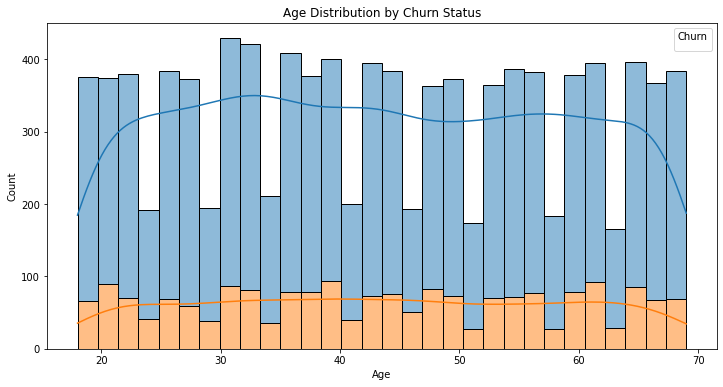

In [15]:
plot_distribution_by_churn(df,'Age')

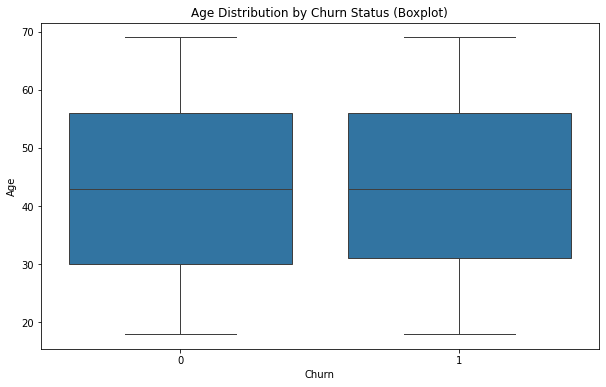

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'Age Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='Age'>)

In [21]:
plot_boxplot_by_churn(df,'Age')

In [16]:
bins = [17, 29, 44, 59, 69]  # upper limit includes max age
labels = ['young_adults', 'mid_age', 'older_adults', 'seniors']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [17]:
df['AgeGroup'].value_counts()

mid_age         3023
older_adults    2825
young_adults    2272
seniors         1880
Name: AgeGroup, dtype: int64

In [18]:
print(churn_counts_by_feature('AgeGroup'))

              Not Churned  Churned  Total  Churn Rate (%)
AgeGroup                                                 
seniors              1498      382   1880       20.319149
mid_age              2418      605   3023       20.013232
older_adults         2272      553   2825       19.575221
young_adults         1840      432   2272       19.014085


The data is well distributed across the adult age spectrum (18–69).

Distribution is fairly symmetric around the median (43), which matches the mean.

No nulls or obvious outliers, so it's clean and ready for modeling.

Churn rate is quite consistent across age groups — roughly between 19% and 20.3%.

Seniors (60–69) show the highest churn rate at 20.32%, while Young Adults (18–29) have the lowest at 19.01%.

But differences are small, indicating age alone is not a strong differentiator in churn.

### SubscriptionType

In [22]:
df['SubscriptionType'].value_counts()

Standard    4024
Basic       3934
Premium     2042
Name: SubscriptionType, dtype: int64

In [23]:
print(churn_counts_by_feature('SubscriptionType'))

                  Not Churned  Churned  Total  Churn Rate (%)
SubscriptionType                                             
Premium                  1624      418   2042       20.470127
Standard                 3229      795   4024       19.756461
Basic                    3175      759   3934       19.293340


The IDV does not have a missing value. Premium has the highest churn rate (~20.5%), even though it's the highest-tier plan.

This might seem counterintuitive — perhaps users don’t feel they’re getting value for the higher price.

Suggests a need to investigate content satisfaction or tech issues with Premium users.

Standard and Basic have similar churn rates (~19%), slightly better than Premium.

This might indicate more stable satisfaction at these price levels.

Premium users have the highest churn rate, implying a potential mismatch between pricing and perceived value. The company should investigate the Premium experience — are features delivering enough value? Consider personalized engagement or loyalty incentives for this tier.

### MonthlySpend

In [24]:
df['MonthlySpend'].describe()

count    10000.000000
mean        28.578830
std         18.032781
min          5.000000
25%         16.487500
50%         27.845000
75%         38.890000
max        247.300000
Name: MonthlySpend, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


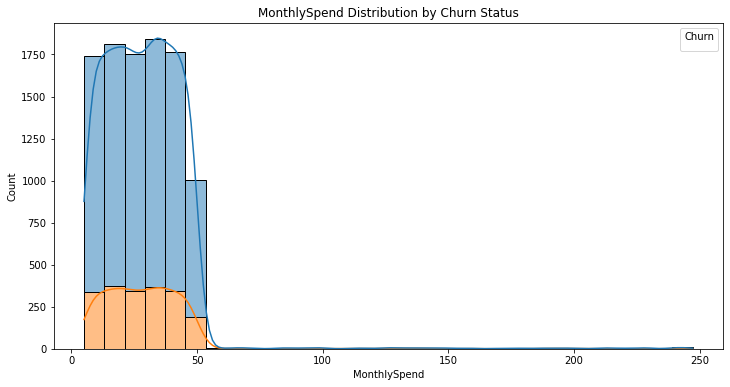

(<Figure size 864x432 with 1 Axes>,
 <Axes: title={'center': 'MonthlySpend Distribution by Churn Status'}, xlabel='MonthlySpend', ylabel='Count'>)

In [27]:
plot_distribution_by_churn(df,'MonthlySpend')

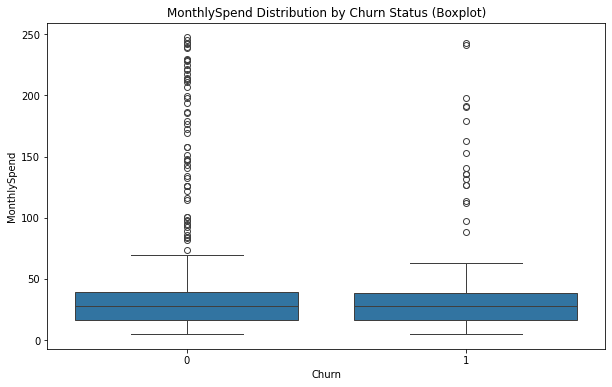

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'MonthlySpend Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='MonthlySpend'>)

In [28]:
plot_boxplot_by_churn(df,'MonthlySpend')

Distribution is likely right-skewed, given that the max (247) is much higher than the mean and 75th percentile.

Most users spend between 16.49 and 38.89, with some outliers in high spend.

MonthlySpend is a continuous, numerical feature — useful in nearly all models.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


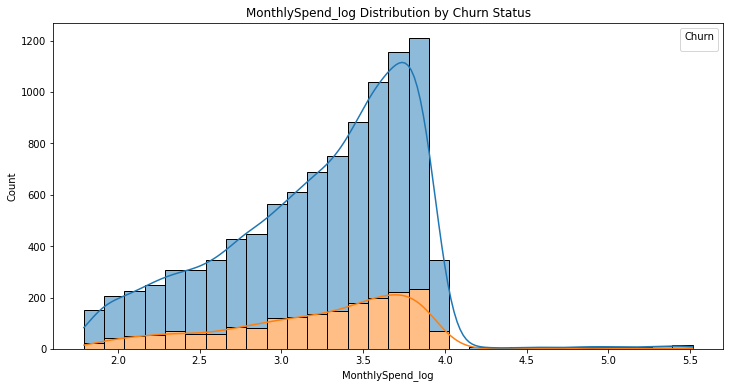

(<Figure size 864x432 with 1 Axes>,
 <Axes: title={'center': 'MonthlySpend_log Distribution by Churn Status'}, xlabel='MonthlySpend_log', ylabel='Count'>)

In [31]:
import numpy as np
#lets apply log transformationand see if it handled the skewness
df['MonthlySpend_log'] = np.log1p(df['MonthlySpend'])
plot_distribution_by_churn(df,'MonthlySpend_log')

In [32]:
#Create spending segments (e.g., low, medium, high spenders).
df['SpendBucket'] = pd.qcut(df['MonthlySpend_log'], q=3, labels=['Low', 'Medium', 'High'])

In [33]:
print(churn_counts_by_feature('SpendBucket'))

             Not Churned  Churned  Total  Churn Rate (%)
SpendBucket                                             
Low                 2668      668   3336       20.023981
High                2676      657   3333       19.711971
Medium              2684      647   3331       19.423597


There is no clear pattern, suggesting MonthlySpend still has limited value on its own.

differences are minimal across spend bucket.

This reinforces the idea that price alone isn't driving retention — it's likely more about experience, content value, or user engagement.

### TotalWatchTime

In [34]:
df['TotalWatchTime'].describe()

count    10000.000000
mean        24.501400
std         14.427551
min          0.000000
25%         12.000000
50%         25.000000
75%         37.000000
max         49.000000
Name: TotalWatchTime, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


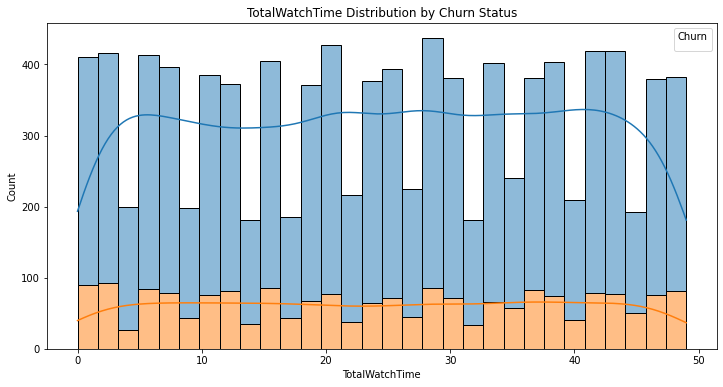

(<Figure size 864x432 with 1 Axes>,
 <Axes: title={'center': 'TotalWatchTime Distribution by Churn Status'}, xlabel='TotalWatchTime', ylabel='Count'>)

In [35]:
plot_distribution_by_churn(df,'TotalWatchTime')

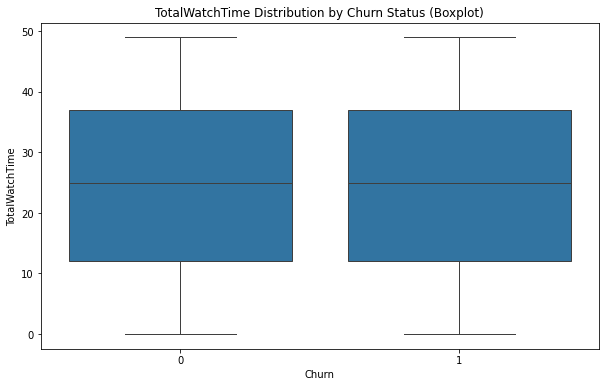

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'TotalWatchTime Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='TotalWatchTime'>)

In [36]:
plot_boxplot_by_churn(df,'TotalWatchTime')

Watch time ranges from 0 to 49 hours, with a fairly wide spread.

The distribution seems symmetric, with a median of 25 and max value 49.

This feature likely correlates negatively with churn — low engagement users tend to churn more.

Anyway lets see how it goes while splitting it into different buckets

In [37]:
df['WatchBucket'] = pd.qcut(df['TotalWatchTime'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])
print(churn_counts_by_feature('WatchBucket'))

             Not Churned  Churned  Total  Churn Rate (%)
WatchBucket                                             
Very Low            2075      535   2610       20.498084
High                1928      476   2404       19.800333
Medium              1964      474   2438       19.442166
Low                 2061      487   2548       19.113030


Churn rates are fairly consistent across all watch time buckets, with a range of 19.1% to 20.5%.

Watch time doesn't seem to be a strong differentiator for churn. Users who engage at any level still churn at almost the same rate.

we can cross this with other features (e.g., SubscriptionType, AgeGroup) to see if watch time combined with other features can explain churn.

### ComplaintCount

In [38]:
df['ComplaintCount'].describe()

count    10000.000000
mean         1.000300
std          1.001299
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: ComplaintCount, dtype: float64

behavioral feature that might provide useful insights into churn. It reflects how many times a customer has complained, and it can be a strong predictor of dissatisfaction.

25th percentile: 0 (25% have no complaints)

Median: 1 (50% have 1 or fewer complaints)

75th percentile: 2 (75% have 2 or fewer complaints)

Max: 8 (some users have made up to 8 complaints)


Majority of customers (75%) have made 2 or fewer complaints logically this means most users either don't complain or complain rarely.

A small group of customers has made many complaints (up to 8), which could indicate high dissatisfaction and a strong indicator of potential churn.

In [39]:
# Define complaint buckets
df['ComplaintBucket'] = pd.cut(df['ComplaintCount'], bins=[-1, 0, 1, 2, 3, 8], labels=['No Complaints', '1 Complaint', '2 Complaints', '3 Complaints', 'Multiple Complaints'])
print(churn_counts_by_feature('ComplaintBucket'))

                     Not Churned  Churned  Total  Churn Rate (%)
ComplaintBucket                                                 
Multiple Complaints          137       38    175       21.714286
2 Complaints                1483      388   1871       20.737573
1 Complaint                 2902      720   3622       19.878520
No Complaints               2979      722   3701       19.508241
3 Complaints                 527      104    631       16.481775


Churn rate increases as the number of complaints rises — users with multiple complaints (21.71%) churn the most, followed by those with 2 complaints (20.74%).

The lowest churn rate occurs among users with 3 complaints (16.48%) — this is interesting and could suggest that users with moderate complaints (not too few, not too many) might be resolving their issues.

The pattern isn't strictly linear, but there is a noticeable trend: more complaints correlate with a higher churn rate.

Complaint count is a clear predictor of churn, especially when users have multiple complaints. These users might be dissatisfied or frustrated, and the company should focus on resolving their issues promptly to prevent churn.

### DaysSinceLastLogin

In [40]:
df['DaysSinceLastLogin'].describe()

count    10000.000000
mean        29.457000
std         17.238488
min          0.000000
25%         14.000000
50%         30.000000
75%         44.000000
max         59.000000
Name: DaysSinceLastLogin, dtype: float64

25th percentile: 14 days (25% of users logged in in the last 14 days)

Median: 30 days (50% of users logged in in the last 30 days)

75th percentile: 44 days (75% of users logged in in the last 44 days)

Max: 59 days (some users haven't logged in for almost 2 months)

Majority of users seem to log in at least once in the last 30-40 days.

0 days (just logged in) and 59 days (last login almost two months ago) suggest significant differences in recent activity.

Users who haven’t logged in for a long time are at high risk of churn (e.g., 59 days could indicate abandonment).

In [41]:
# Define buckets based on quartiles
df['LoginBucket'] = pd.cut(df['DaysSinceLastLogin'], bins=[-1, 7, 14, 30, 60], labels=['1 Week', '2 Weeks', '1 Month', '2+ Months'])
print(churn_counts_by_feature('LoginBucket'))

             Not Churned  Churned  Total  Churn Rate (%)
LoginBucket                                             
2 Weeks              918      230   1148       20.034843
1 Month             2137      530   2667       19.872516
2+ Months           3878      953   4831       19.726765
1 Week              1095      259   1354       19.128508


Churn rate is fairly consistent across the buckets (ranging from 19.12% to 20.03%).

Users who haven’t logged in for more than a month (2+ months) still have a churn rate (19.73%) that is close to the others.

2 weeks has less sample but still the churn rates higher and matching with other segments. So it has some correlation with the DV.

### AvgSessionDuration

In [42]:
df['AvgSessionDuration'].describe()

count    10000.000000
mean       153.449057
std         84.909956
min          5.040000
25%         79.205000
50%        154.925000
75%        227.545000
max        299.960000
Name: AvgSessionDuration, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


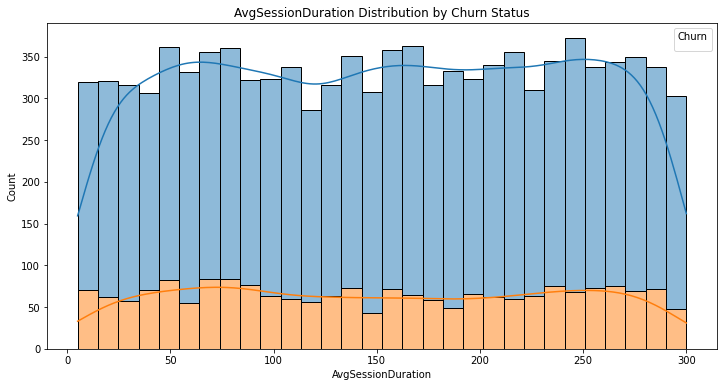

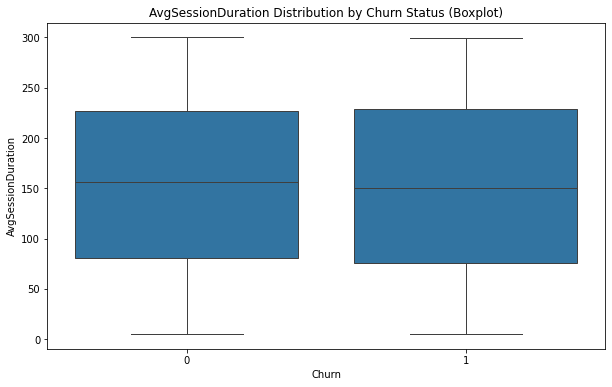

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'AvgSessionDuration Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='AvgSessionDuration'>)

In [43]:
plot_distribution_by_churn(df,'AvgSessionDuration')
plot_boxplot_by_churn(df,'AvgSessionDuration')

The average session duration is relatively long (mean = 153 minutes), but there's high variability (std = 85 minutes).

A few users spend much longer per session, with the maximum session duration being just under 5 hours.

Short sessions (e.g., < 10 minutes) might indicate poor engagement, while long sessions likely reflect higher satisfaction or engagement.



In [44]:
# Define session buckets
df['SessionBucket'] = pd.cut(df['AvgSessionDuration'], bins=[-1, 30, 90, 150, 300], labels=['< 30 min', '30-90 min', '90-150 min', '> 150 min'])
print(churn_counts_by_feature('SessionBucket'))

               Not Churned  Churned  Total  Churn Rate (%)
SessionBucket                                             
30-90 min             1608      450   2058       21.865889
< 30 min               656      170    826       20.581114
> 150 min             4172      984   5156       19.084562
90-150 min            1592      368   1960       18.775510


The highest churn rate occurs in the 30-90 minute bucket (21.87%), followed by the < 30 min bucket (20.58%).

Users who spend 90-150 minutes per session have the lowest churn rate (18.78%), indicating they might be more engaged.

Users who spend the longest time (>150 min) also have a relatively low churn rate (19.08%), but it's still higher than the 90-150 min bucket.

30-90 minutes - While they spend a reasonable amount of time on the platform, they exhibit the highest churn rate, which could indicate that they are not fully satisfied or engaged.

Users in the 90-150 min bucket have lower churn rates, so finding ways to increase engagement for users with shorter sessions could potentially reduce churn.


### NumDevicesUsed

In [45]:
df['NumDevicesUsed'].describe()

count    10000.000000
mean         2.510900
std          1.123747
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: NumDevicesUsed, dtype: float64

In [47]:
df['DevicesBucket'] = pd.cut(df['NumDevicesUsed'], bins=[0, 1, 2, 3, 4], labels=['1 Device', '2 Devices', '3 Devices', '4 Devices'])

In [48]:
print(churn_counts_by_feature('DevicesBucket'))

               Not Churned  Churned  Total  Churn Rate (%)
DevicesBucket                                             
1 Device              2000      515   2515       20.477137
3 Devices             2015      511   2526       20.229612
2 Devices             1926      484   2410       20.082988
4 Devices             2087      462   2549       18.124755


The number of devices used doesn't show a dramatic effect on churn, though users with 4 devices appear to churn slightly less, which could indicate greater engagement or multiple touchpoints for content consumption.

However, the difference is not large enough to confidently conclude that more devices directly reduce churn. It could be that other factors (e.g., content preferences, usage behavior, subscription plans) have a stronger influence.

### ContentPreferenceScore

In [49]:
df['ContentPreferenceScore'].describe()

count    9000.000000
mean       50.146835
std        29.144203
min       -18.674969
25%        25.000000
50%        50.000000
75%        76.000000
max       113.442819
Name: ContentPreferenceScore, dtype: float64

Min = -18.67 likely data error or incorrect imputation

Max = 113.44 possibly outlier or scaling error

This feature is crucial as it directly indicates how well the platform's content aligns with a customer's preferences. A higher content preference score typically means the customer is more satisfied with the content, which could correlate with lower churn.

In [50]:
df['PreferenceBucket'] = pd.cut(df['ContentPreferenceScore'], bins=[-1, 30, 60, 90, 100], 
                                 labels=['Low', 'Medium', 'High', 'Very High'])
print(churn_counts_by_feature('PreferenceBucket'))

                  Not Churned  Churned  Total  Churn Rate (%)
PreferenceBucket                                             
Low                      2159      572   2731       20.944709
Medium                   2162      523   2685       19.478585
High                     2151      518   2669       19.408018
Very High                 734      152    886       17.155756


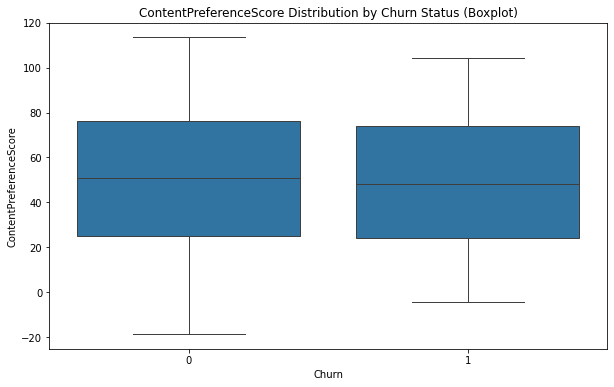

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'ContentPreferenceScore Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='ContentPreferenceScore'>)

In [55]:
plot_boxplot_by_churn(df,'ContentPreferenceScore')

In [59]:
df[df['ContentPreferenceScore']<0]

,CustomerID,Gender,Age,SubscriptionType,MonthlySpend,TotalWatchTime,ComplaintCount,DaysSinceLastLogin,Churn,AvgSessionDuration,...,SocialMediaMentions,AgeGroup,MonthlySpend_log,SpendBucket,WatchBucket,ComplaintBucket,LoginBucket,SessionBucket,DevicesBucket,PreferenceBucket
534,535,Male,61,Basic,8.66,9,1,17,0,68.57,...,15,seniors,2.267994,Low,Very Low,1 Complaint,1 Month,30-90 min,2 Devices,NaN
830,831,Male,28,Basic,48.65,21,1,43,0,37.64,...,8,young_adults,3.904998,High,Low,1 Complaint,2+ Months,30-90 min,3 Devices,Low
1356,1357,Female,51,Standard,239.30,18,0,20,0,282.55,...,7,older_adults,5.481888,High,Low,No Complaints,1 Month,> 150 min,2 Devices,NaN
2361,2362,Female,50,Basic,39.92,19,2,16,1,253.79,...,3,older_adults,3.711619,High,Low,2 Complaints,1 Month,> 150 min,3 Devices,NaN
2589,2590,Male,30,Basic,19.60,22,1,48,0,178.81,...,12,mid_age,3.025291,Low,Low,1 Complaint,2+ Months,> 150 min,2 Devices,NaN
5366,5367,Male,55,Basic,20.29,46,0,54,0,144.77,...,19,older_adults,3.058237,Medium,High,No Complaints,2+ Months,90-150 min,2 Devices,Low
5969,5970,Male,45,Standard,48.96,39,2,49,1,210.55,...,4,older_adults,3.911223,High,High,2 Complaints,2+ Months,> 150 min,2 Devices,NaN
6318,6319,Female,47,Basic,19.32,34,2,45,0,144.33,...,6,older_adults,3.011606,Low,Medium,2 Complaints,2+ Months,90-150 min,4 Devices,NaN
8153,8154,Female,38,Basic,34.70,39,1,42,0,73.18,...,13,mid_age,3.575151,Medium,High,1 Complaint,2+ Months,30-90 min,4 Devices,NaN
8473,8474,Male,25,Basic,19.87,47,1,39,0,137.01,...,4,young_adults,3.038313,Low,High,1 Complaint,2+ Months,90-150 min,3 Devices,NaN


preference score should logically be > 0 and <=100, negative values are likely errors or data collection error. So, we can convert that also as nan. which is only 0.16% of 9000 rows.

This Feature showing a clear relationship with churn, median imputation grouped by DV (Churn) strikes a great balance between simplicity and preserving signal.

In [61]:
df.loc[df['ContentPreferenceScore'] < 0, 'ContentPreferenceScore'] = np.nan

In [62]:
df['ContentPreferenceScore'] = df.groupby('Churn')['ContentPreferenceScore'].transform(
    lambda x: x.fillna(x.median())
)


### ActiveDaysLastMonth

In [63]:
df['ActiveDaysLastMonth'].describe()

count    10000.000000
mean        15.003500
std          8.933838
min          0.000000
25%          7.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: ActiveDaysLastMonth, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


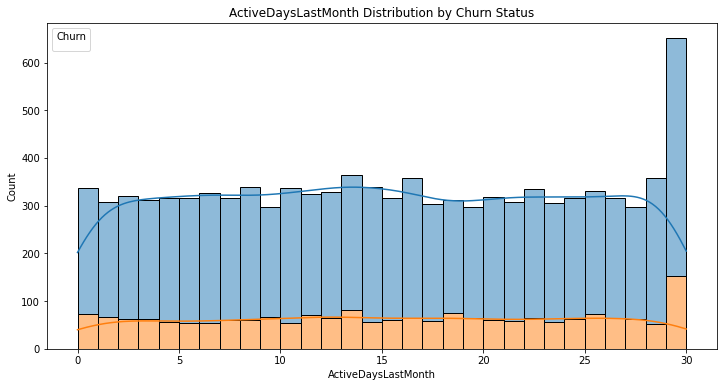

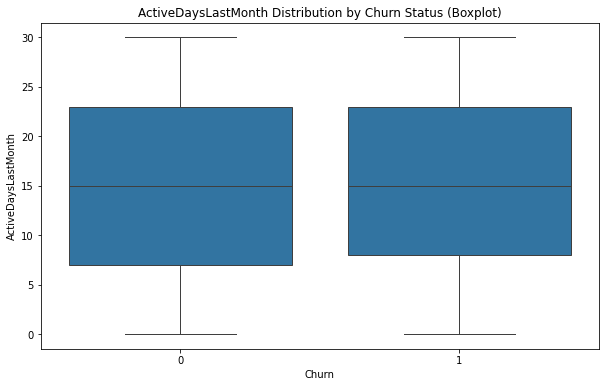

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'ActiveDaysLastMonth Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='ActiveDaysLastMonth'>)

In [65]:
plot_distribution_by_churn(df,'ActiveDaysLastMonth')
plot_boxplot_by_churn(df,'ActiveDaysLastMonth')

In [67]:
# Create a new column for the binned ActiveDaysLastMonth
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
df['ActiveDaysGroup'] = pd.cut(df['ActiveDaysLastMonth'], bins=bins, labels=labels, right=True)
print(churn_counts_by_feature('ActiveDaysGroup'))

                 Not Churned  Churned  Total  Churn Rate (%)
ActiveDaysGroup                                             
26-30                   1290      332   1622       20.468557
16-20                   1268      322   1590       20.251572
11-15                   1338      334   1672       19.976077
21-25                   1280      314   1594       19.698871
0-5                     1269      300   1569       19.120459
6-10                    1318      297   1615       18.390093


Mean: 15.00 (on average, customers are active for 15 days in the last month).

Min: 0 (some customers were not active at all during the last month).

Max: 30 (some customers were active every day in the last month).

Churn rates are fairly flat across activity groups — ranging from ~18.4% to ~20.5%.

Surprisingly, there's no strong pattern where more active users churn less.

Still 6-10 has a less churn rate which could be useful for the model.

### BingeWatchRatio

In [68]:
df['BingeWatchRatio'].describe()

count    9000.000000
mean        3.965676
std         7.355427
min         0.000000
25%         0.800000
50%         1.610000
75%         3.330000
max        49.000000
Name: BingeWatchRatio, dtype: float64

There’s significant skew (median = 1.61 vs. mean = 3.97), indicating some users binge far more than others.

Max value of 49 is a potential outlier.

Missing values: 1,000 users are missing data in this column.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


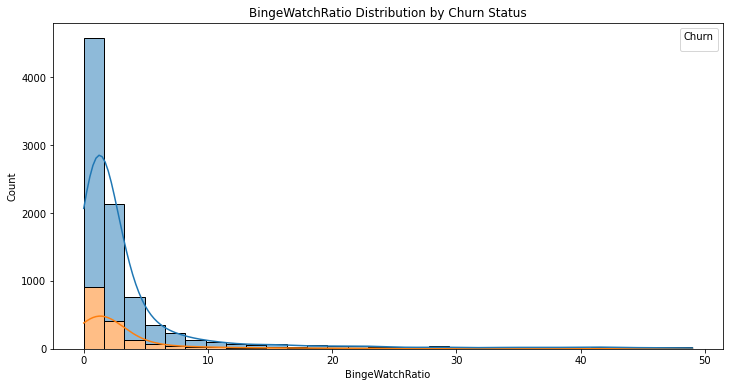

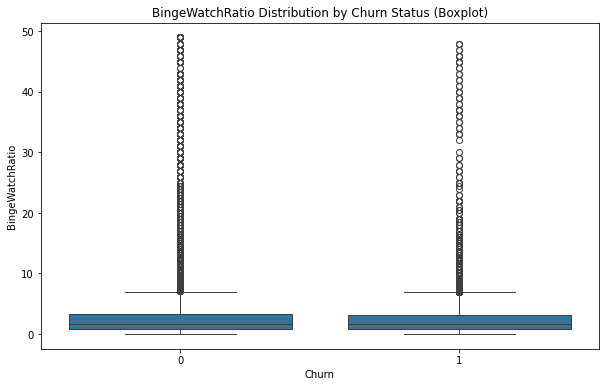

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'BingeWatchRatio Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='BingeWatchRatio'>)

In [70]:
plot_distribution_by_churn(df,'BingeWatchRatio')
plot_boxplot_by_churn(df,'BingeWatchRatio')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


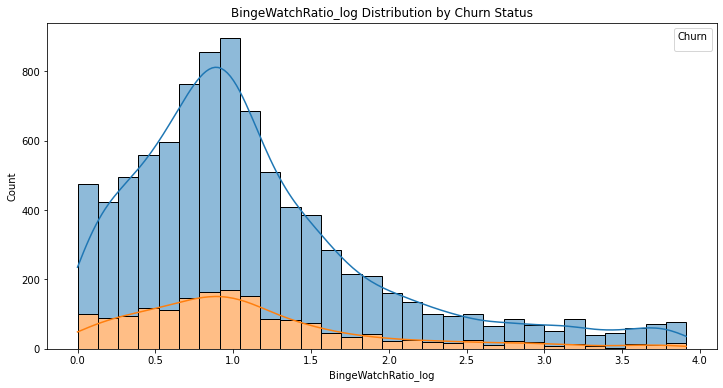

(<Figure size 864x432 with 1 Axes>,
 <Axes: title={'center': 'BingeWatchRatio_log Distribution by Churn Status'}, xlabel='BingeWatchRatio_log', ylabel='Count'>)

In [71]:
df['BingeWatchRatio_log'] = np.log1p(df['BingeWatchRatio'])
plot_distribution_by_churn(df,'BingeWatchRatio_log')

In [72]:
df['BingeWatchRatio_log'].describe()

count    9000.000000
mean        1.136450
std         0.820118
min         0.000000
25%         0.587787
50%         0.959350
75%         1.465568
max         3.912023
Name: BingeWatchRatio_log, dtype: float64

In [86]:
df['BingeWatchBucket'] = pd.qcut(df['BingeWatchRatio_log'], q=6, labels=['1', '2', '3', '4','5','6'])

In [87]:
print(churn_counts_by_feature('BingeWatchBucket'))

                  Not Churned  Churned  Total  Churn Rate (%)
BingeWatchBucket                                             
1                        1199      316   1515       20.858086
4                        1187      296   1483       19.959541
6                        1183      291   1474       19.742198
2                        1203      295   1498       19.692924
3                        1217      289   1506       19.189907
5                        1255      269   1524       17.650919


5th bucket - 17.65 - Lowest churn — users with highest binge-watching ratio. So this will be a useful feature.

In [88]:
df['BingeWatchRatio_log'] = df.groupby('Churn')['BingeWatchRatio_log'].transform(
    lambda x: x.fillna(x.median())
)

### SkippedContentCount

In [89]:
df['SkippedContentCount'].describe()

count    10000.000000
mean         9.636500
std          5.960866
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         38.000000
Name: SkippedContentCount, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


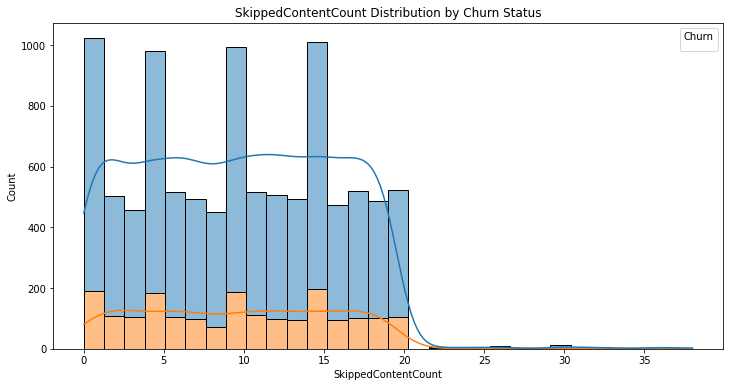

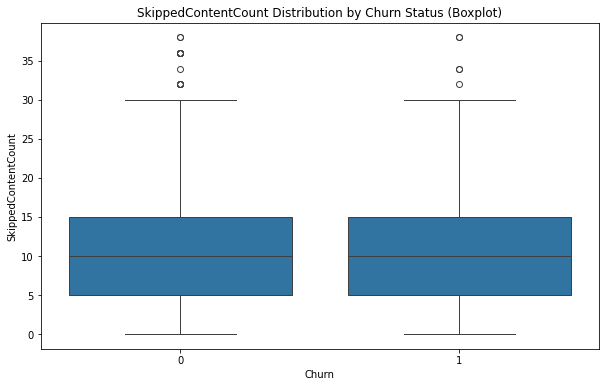

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'SkippedContentCount Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='SkippedContentCount'>)

In [91]:
plot_distribution_by_churn(df,'SkippedContentCount')
plot_boxplot_by_churn(df,'SkippedContentCount')

In [93]:
df['SkippedContentCount'].skew()

0.1671372295388769

Skew ≈ 0 → symmetric (normal-like)

Skew > 0 → positively skewed (right tail longer)

Skew < 0 → negatively skewed (left tail longer)

though it look like skewed its not that much skewed it has very minimal value which creates that observation.

In [5]:
bins = [0, 4, 8, 12, 20, df['SkippedContentCount'].max()]
labels = ['0–4', '5–8', '9–12', '13–20', '>20']

df['SkippedGroup'] = pd.cut(df['SkippedContentCount'], bins=bins, labels=labels, include_lowest=True)
print(churn_counts_by_feature('SkippedGroup'))

              Not Churned  Churned  Total  Churn Rate (%)
SkippedGroup                                             
>20                    37       14     51       27.450980
13–20                2810      697   3507       19.874537
0–4                  1991      489   2480       19.717742
9–12                 1622      394   2016       19.543651
5–8                  1568      378   1946       19.424460


For users skipping 0–20 items, churn rate is consistently ~19.5–19.9%.

Suggests mild or moderate skipping is not strongly associated with churn.

Very high skipping (>20) stands out:

Small group (only 51 users), but with significantly higher churn (27.45%).

Indicates extreme skipping may be a red flag — these users might be unhappy with available content or not finding anything they like.

It's not linearly related to churn. So we can either bucket it, or create a binary feature like is_high_skipper = SkippedContentCount > 20.

If used raw, consider log-transforming due to the long tail.

### DiscountReceived

In [6]:
df['DiscountReceived'].describe()

count    10000.000000
mean        10.008391
std          5.773516
min          0.010000
25%          4.990000
50%         10.000000
75%         14.962500
max         20.000000
Name: DiscountReceived, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


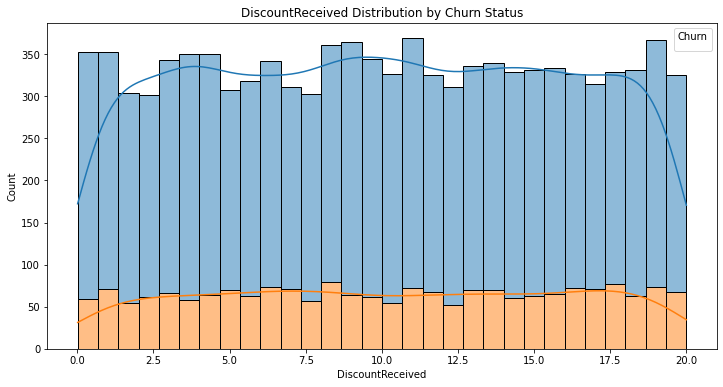

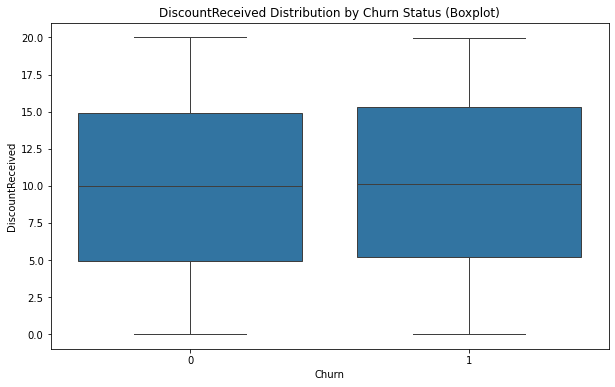

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'DiscountReceived Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='DiscountReceived'>)

In [7]:
plot_distribution_by_churn(df,'DiscountReceived')
plot_boxplot_by_churn(df,'DiscountReceived')

In [8]:
bins = [0, 5, 10, 15, 20]
labels = ['0–5', '6–10', '11–15', '16–20']

df['DiscountBucket'] = pd.cut(df['DiscountReceived'], bins=bins, labels=labels, include_lowest=True)
print(churn_counts_by_feature('DiscountBucket'))

                Not Churned  Churned  Total  Churn Rate (%)
DiscountBucket                                             
16–20                  1967      515   2482       20.749396
6–10                   1998      498   2496       19.951923
11–15                  2031      482   2513       19.180263
0–5                    2032      477   2509       19.011558


No missing values.

Values appear to be uniformly distributed (min close to 0, max at 20, and mean 10).

Likely tied to some fixed promotional strategy (e.g., 0–20% or $0–$20).

Churn is fairly stable across groups — all around ~19–20%.

Unexpectedly, users receiving higher discounts (16–20) have slightly higher churn.

More discount ≠ more loyalty:

The assumption that higher discounts would reduce churn doesn't hold here.

It's possible that discounts are either:

Poorly targeted, or

Attracting users who aren't loyal in the first place (discount seekers).

### LoyaltyScore

In [9]:
df['LoyaltyScore'].describe()

count    10000.000000
mean         4.965827
std          2.939968
min         -5.379779
25%          2.430000
50%          4.951940
75%          7.501691
max         13.495991
Name: LoyaltyScore, dtype: float64

In [10]:
negative_loyalty = df[df['LoyaltyScore'] < 0]
print(f"Negative loyalty scores: {len(negative_loyalty)}")

Negative loyalty scores: 49


In [11]:
bins = [-6, 2, 4, 6, 8, df['LoyaltyScore'].max()]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

df['LoyaltyBucket'] = pd.cut(df['LoyaltyScore'], bins=bins, labels=labels, include_lowest=True)
print(churn_counts_by_feature('LoyaltyBucket'))

               Not Churned  Churned  Total  Churn Rate (%)
LoyaltyBucket                                             
Low                   1590      428   2018       21.209118
High                  1553      410   1963       20.886398
Very Low              1643      404   2047       19.736199
Moderate              1590      379   1969       19.248349
Very High             1652      351   2003       17.523714


In [12]:
correlation = df['LoyaltyScore'].corr(df['Churn'])
print(f"Correlation between Loyalty Score and Churn: {correlation}")

Correlation between Loyalty Score and Churn: -0.011189807673519164


The correlation with churn is extremely low (around -0.01), which means it does not have a meaningful linear relationship with the target variable (churn).

No Clear Pattern in Buckets:

The churn rate across the bucketed loyalty scores doesn't show a clear, consistent trend.

There’s some unexpected behavior (e.g., high churn in the low and high loyalty buckets).

Possible Data Quality Issues:

Negative values suggest there may be issues with how the score is calculated or scaled.

If these negative values are invalid, they could distort the analysis and lead to misleading insights.

Potential Noise:

If LoyaltyScore is not well-calibrated, it might just be adding noise to the model rather than helping. So better we can drop

### PlatformType

In [13]:
df['PlatformType'].value_counts()

Mobile    5066
Web       2956
TV        1978
Name: PlatformType, dtype: int64

In [17]:
print(churn_counts_by_feature('PlatformType'))

              Not Churned  Churned  Total  Churn Rate (%)
PlatformType                                             
Mobile               4040     1026   5066       20.252665
Web                  2379      577   2956       19.519621
TV                   1609      369   1978       18.655207


The Mobile platform has the highest number of users, followed by Web and TV.

Given that Mobile is the most common platform, it's crucial to analyze how each platform behaves in terms of churn rates, user engagement, and other metrics.

Mobile users have the highest churn rate (20.25%), which could be a concern, especially since it is the largest group.

TV users show the lowest churn rate (18.66%), which might indicate more engagement or satisfaction with the platform.

Web users have a moderate churn rate (19.52%), slightly higher than TV but lower than Mobile.

Potential Platform-Specific Issues:

Mobile users: The higher churn rate on mobile could indicate issues like usability, app performance, or engagement. Exploring features like AvgSessionDuration, TotalWatchTime, and ActiveDaysLastMonth for mobile users may uncover reasons for the higher churn.

TV and Web: These platforms have lower churn rates, suggesting better retention or different user behavior. Investigating platform-specific usage metrics might reveal why these users stay longer.

### AdInteractionCount

In [15]:
df['AdInteractionCount'].describe()

count    9000.000000
mean       24.631111
std        14.397047
min         0.000000
25%        12.000000
50%        25.000000
75%        37.000000
max        49.000000
Name: AdInteractionCount, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


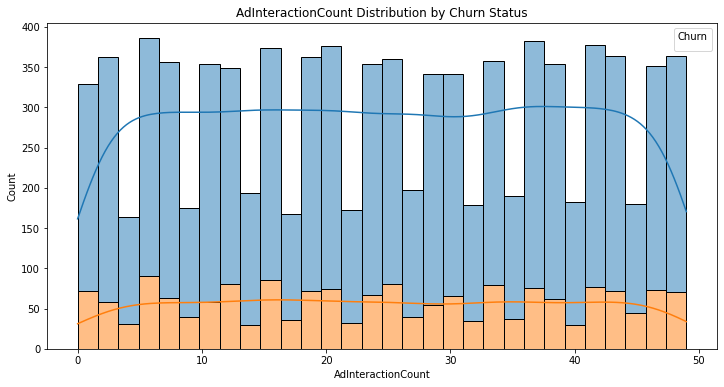

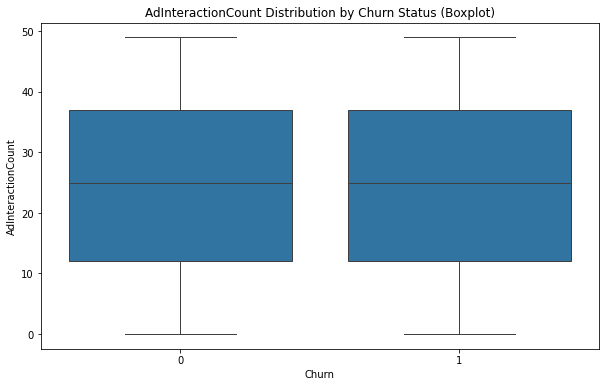

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'AdInteractionCount Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='AdInteractionCount'>)

In [16]:
plot_distribution_by_churn(df,'AdInteractionCount')
plot_boxplot_by_churn(df,'AdInteractionCount')

In [18]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
df['AdInteractionGroup'] = pd.cut(df['AdInteractionCount'], bins=bins, labels=labels)
print(churn_counts_by_feature('AdInteractionGroup'))

                    Not Churned  Churned  Total  Churn Rate (%)
AdInteractionGroup                                             
41-50                      1302      336   1638       20.512821
11-20                      1452      372   1824       20.394737
0-10                       1436      347   1783       19.461582
21-30                      1434      344   1778       19.347582
31-40                      1470      349   1819       19.186366


Moderate Interaction with Ads: The average number of ad interactions is around 24.63, with the majority of users having interactions between 12 and 37.

Skewed Distribution: There may be a few users with high interaction counts, but overall the distribution seems relatively spread out.

In this also we can do Dv based median imputataion

### ReferredFriendsCount

In [19]:
df['ReferredFriendsCount'].describe()

count    10000.000000
mean         4.450700
std          2.889361
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: ReferredFriendsCount, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


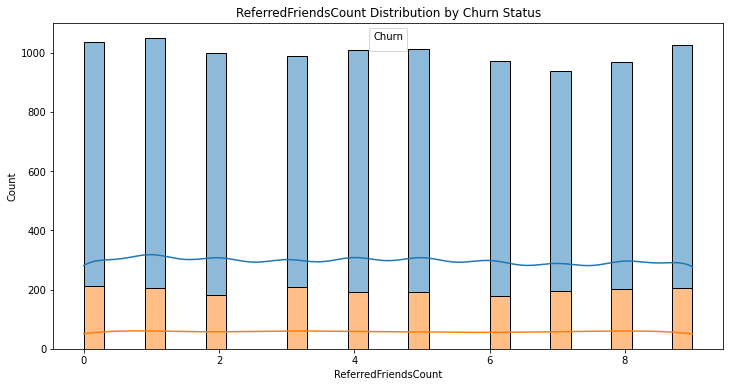

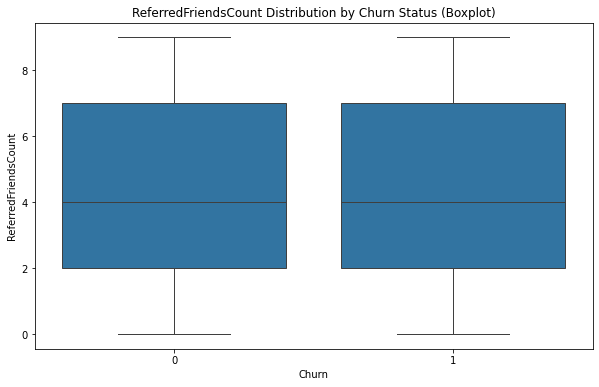

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'ReferredFriendsCount Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='ReferredFriendsCount'>)

In [20]:
plot_distribution_by_churn(df,'ReferredFriendsCount')
plot_boxplot_by_churn(df,'ReferredFriendsCount')

In [21]:
bins = [0, 1, 3, 6, 9]
labels = ['0', '1-2', '3-5', '6+']
df['ReferredFriendsGroup'] = pd.cut(df['ReferredFriendsCount'], bins=bins, labels=labels)
print(churn_counts_by_feature('ReferredFriendsGroup'))

                      Not Churned  Churned  Total  Churn Rate (%)
ReferredFriendsGroup                                             
6+                           2332      602   2934       20.518064
1-2                          1595      391   1986       19.687815
0                             845      204   1049       19.447092
3-5                          2431      564   2995       18.831386


Premium users with 6+ referrals have the highest churn rate in their respective group (22.39%), suggesting that high referral activity may not necessarily indicate a loyal user base in the Premium tier.

Standard and Basic users have relatively stable churn rates across referral groups, but 1-2 referrals show spikes in churn, particularly for Standard users.


The Premium group shows some interesting patterns. The lower churn rate for the 1-2 referral group and the higher churn rate for the 6+ referral group could indicate that highly engaged Premium users (those referring many people) are not as satisfied and may be more likely to churn. Investigate why Premium users who refer a lot leave.

Standard Subscription:

The high churn rate in the 1-2 referrals group suggests that these users might be marginally engaged or dissatisfied with their subscription. You could explore their usage patterns (e.g., content engagement, watch time, etc.) to uncover whether the Standard subscription's features are mismatched with their needs.

Retention Strategies:

Basic users with 1-2 referrals could benefit from additional incentives to reduce churn. For instance, offering rewards for continued engagement could encourage them to stay.

Consider targeted campaigns or loyalty programs for Premium users with high referral numbers to enhance their experience and reduce churn.

### SocialMediaMentions

In [11]:
df['SocialMediaMentions'].describe()

count    10000.000000
mean         9.492000
std          5.707608
min          0.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         19.000000
Name: SocialMediaMentions, dtype: float64

Skewness: The distribution is right-skewed: There's a small group of users with a high number of mentions, but most users have a lower number. This suggests a long-tail distribution, where a majority of users are not highly active on social media.

Engagement Level: The average number of mentions (9.49) implies moderate social media activity. However, the standard deviation (5.71) suggests there is considerable variation, with some users engaging a lot more than others.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


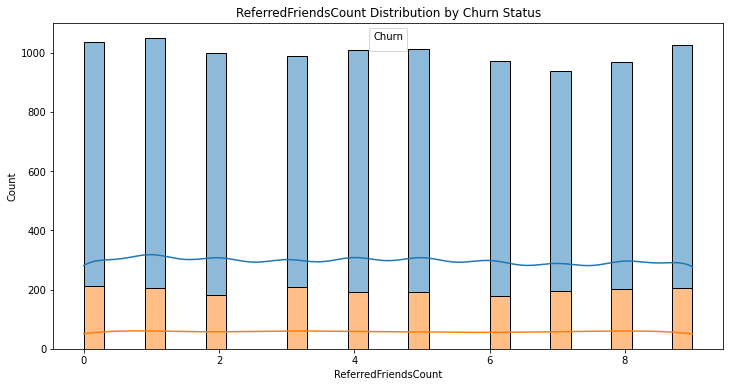

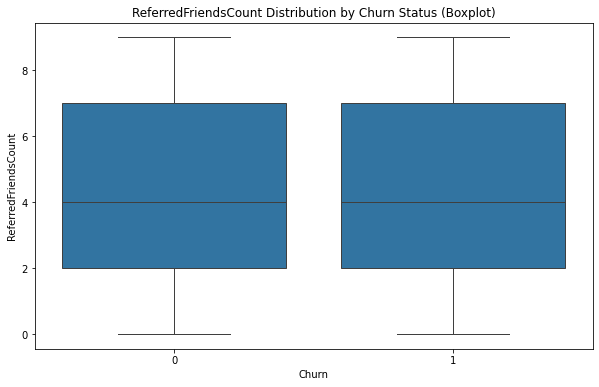

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'ReferredFriendsCount Distribution by Churn Status (Boxplot)'}, xlabel='Churn', ylabel='ReferredFriendsCount'>)

In [12]:
plot_distribution_by_churn(df,'ReferredFriendsCount')
plot_boxplot_by_churn(df,'ReferredFriendsCount')

In [16]:
# Correlation

def get_positive_correlations(df, target_col='Churn'):
    # Select numeric columns only
    numeric_df = df.select_dtypes(include='number')
    
    # Drop rows with missing values for correlation (optional: can use fillna if desired)
    corr_matrix = numeric_df.corr()
    
    # Get correlations with the target column
    corr_with_target = corr_matrix[target_col].drop(target_col)
    
    # Filter correlations > 0
    #positive_corr = corr_with_target[corr_with_target < 0].sort_values(ascending=False)
    
    return corr_with_target

# Usage
positive_correlations = get_positive_correlations(df, target_col='Churn')
print(positive_correlations)


CustomerID               -0.003772
Age                       0.002992
MonthlySpend             -0.000212
TotalWatchTime           -0.004351
ComplaintCount           -0.001153
DaysSinceLastLogin       -0.005106
AvgSessionDuration       -0.014813
NumDevicesUsed           -0.019569
ContentPreferenceScore   -0.021735
ActiveDaysLastMonth       0.009709
BingeWatchRatio          -0.001816
SkippedContentCount       0.005811
DiscountReceived          0.012745
LoyaltyScore             -0.011190
AdInteractionCount       -0.000291
ReferredFriendsCount      0.004456
SocialMediaMentions      -0.009522
Name: Churn, dtype: float64


All correlation values are very close to zero, meaning no strong linear relationship exists between these features and churn.

Still, these could interact in non-linear ways with churn, which tree-based models (like XGBoost or Random Forest) can capture better than logistic regression.

### Final Take away

##### Weak Predictors of Churn:

Churn Rate: Around 20% of users churn, highlighting the need for improved retention strategies.

Gender and Age: Very stable churn rates; not strong differentiators.

TotalWatchTime, DaysSinceLastLogin, ActiveDaysLastMonth, NumDevicesUsed: Weak or flat correlation with churn.

LoyaltyScore: No meaningful pattern; potential data quality issues — consider dropping.

##### Promising Predictors:

ComplaintCount: Clear positive relationship with churn. Strong behavioral signal of dissatisfaction.

PlatformType: Mobile users churn more; potential UX or content delivery issues.

AvgSessionDuration: Sweet spot at 90–150 min; too short or medium sessions signal disengagement.

ContentPreferenceScore: Strong feature if cleaned; median imputation by DV makes sense.

BingeWatchRatio: Skewed but informative; heavy bingers have lowest churn.

SkippedContentCount: High skippers show elevated churn — flag extreme values or bin.

SubscriptionType: Premium users show highest churn — investigate perception vs. value.

ReferredFriendsCount: High referrers in Premium churn more — counterintuitive, requires deeper analysis.

##### Features to Clean or Transform

Negative values: Fix in ContentPreferenceScore, LoyaltyScore, SocialMediaMentions if any. We can simply make it as NaN and do median imputation because scores should not be negative. 

Highly skewed distributions: BingeWatchRatio, AdInteractionCount, SkippedContentCount — log-transform can work fairly well.

----

## Phase 2: Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("customer_churn_dataset.csv")

In [3]:
df

,CustomerID,Gender,Age,SubscriptionType,MonthlySpend,TotalWatchTime,ComplaintCount,DaysSinceLastLogin,Churn,AvgSessionDuration,...,ContentPreferenceScore,ActiveDaysLastMonth,BingeWatchRatio,SkippedContentCount,DiscountReceived,LoyaltyScore,PlatformType,AdInteractionCount,ReferredFriendsCount,SocialMediaMentions
0,1,Male,68,Basic,11.35,27,2,57,0,208.32,...,33.0,5,5.40,3,3.16,9.850000,Mobile,18.0,2,9
1,2,Female,57,Standard,30.87,15,0,48,1,289.54,...,62.0,26,0.58,9,5.73,8.290000,TV,5.0,0,18
2,3,Male,24,Basic,32.16,0,1,34,1,194.16,...,NaN,9,0.00,2,18.09,-1.772388,Mobile,33.0,1,16
3,4,Male,49,Standard,35.91,21,0,35,0,245.60,...,90.0,2,10.50,4,19.78,2.380000,Mobile,10.0,8,16
4,5,Male,65,Standard,22.71,0,2,4,0,271.02,...,42.0,15,NaN,12,15.41,4.370000,Mobile,2.0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,27,Standard,45.82,43,0,33,0,137.76,...,21.0,13,3.31,5,10.37,9.980000,Mobile,17.0,1,14
9996,9997,Male,40,Basic,147.75,15,1,21,0,227.40,...,89.0,13,NaN,36,12.59,8.330000,Web,0.0,8,13
9997,9998,Female,23,Basic,35.64,35,0,20,0,244.74,...,88.0,28,1.25,13,18.24,9.390000,Mobile,29.0,6,15
9998,9999,Female,40,Standard,9.27,17,1,32,1,223.73,...,NaN,26,0.65,3,12.59,9.220000,Mobile,28.0,8,4


In [4]:
df['MonthlySpend_log'] = np.log1p(df['MonthlySpend'])
df['BingeWatchRatio_log'] = np.log1p(df['BingeWatchRatio'])

df.loc[df['ContentPreferenceScore'] < 0, 'ContentPreferenceScore'] = np.nan

df['ContentPreferenceScore'] = df.groupby('Churn')['ContentPreferenceScore'].transform(
    lambda x: x.fillna(x.median())
)
df['BingeWatchRatio_log'] = df.groupby('Churn')['BingeWatchRatio_log'].transform(
    lambda x: x.fillna(x.median())
)

df['AdInteractionCount'] = df.groupby('Churn')['AdInteractionCount'].transform(
    lambda x: x.fillna(x.median())
)


In [5]:
df.shape

(10000, 23)

In [6]:
df.set_index('CustomerID',inplace=True)

In [7]:
df = df.drop(['BingeWatchRatio','MonthlySpend'],axis=1)

In [8]:
df.shape

(10000, 20)

In [9]:
df.isna().sum()

Gender                    0
Age                       0
SubscriptionType          0
TotalWatchTime            0
ComplaintCount            0
DaysSinceLastLogin        0
Churn                     0
AvgSessionDuration        0
NumDevicesUsed            0
ContentPreferenceScore    0
ActiveDaysLastMonth       0
SkippedContentCount       0
DiscountReceived          0
LoyaltyScore              0
PlatformType              0
AdInteractionCount        0
ReferredFriendsCount      0
SocialMediaMentions       0
MonthlySpend_log          0
BingeWatchRatio_log       0
dtype: int64

In [10]:
df['LoyaltyScore'].describe()
df.loc[df['LoyaltyScore'] < 0, 'LoyaltyScore'] = 0

In [11]:
idvs_original = df.columns.tolist()

In [12]:
"""
Engagement Intensity
A comprehensive measure of how deeply a user engages with the platform, balancing quantity and quality of activity. 
High engagement often correlates with lower churn.

Logic: Mixes total watch time, binge behavior, daily activeness, and average session duration.
"""
df['EngagementIntensity'] = (
    df['TotalWatchTime'] * df['BingeWatchRatio_log'] +
    df['ActiveDaysLastMonth'] +
    df['AvgSessionDuration'] / 10
)


In [13]:
"""
Friction Score
Combines platform dissatisfaction signals — high complaints or skipped content likely indicates user frustration.

Logic: Complaints + frequent content skipping → dissatisfaction.
"""
df['FrictionScore'] = (
    df['ComplaintCount'] + df['SkippedContentCount'] / 5
)


In [14]:
"""
Content Engagement Score
Reflects how well content is received. Highly engaged users will have high preference scores and low skips.

Logic: Preference score reduced by penalty for skipped content.
"""
df['ContentEngagementScore'] = (
    df['ContentPreferenceScore'] - df['SkippedContentCount'] * 2
)


In [15]:
"""
Churn Likelihood (Normalized)
A normalized indicator capturing whether active users are also paying well — churners are often low-value + low-activity users.

Logic: Normalize activity-weighted spend to identify risky users.
"""
df['ChurnLikelihood'] = df['ActiveDaysLastMonth'] * df['MonthlySpend_log'] / df['MonthlySpend_log'].mean()


In [16]:
"""
Rolling Averages (Behavior Smoothing)
Captures recent behavioral patterns while reducing noise. Useful for trend-aware churn prediction.

Logic: 3-day rolling averages for temporal smoothing of user behavior.

"""
df['Rolling_Avg_SocialMediaMentions'] = df['SocialMediaMentions'].rolling(window=3).mean()
df['Rolling_Avg_ActiveDaysLastMonth'] = df['ActiveDaysLastMonth'].rolling(window=3).mean()
df['Rolling_Avg_AdInteractionCount'] = df['AdInteractionCount'].rolling(window=3).mean()


In [17]:
"""
Multi-Device Usage Flag
Users connected on more devices are more embedded in the ecosystem — less likely to churn.

Logic: Flag users with >2 devices.
"""
df['MultiDeviceUser'] = (df['NumDevicesUsed'] > 2).astype(int)


In [18]:
"""
Recency Engagement Score
Combines recent activity with time since last login — captures decaying interest.

Logic: Engagement divided by staleness (days since last login).
"""
df['RecencyEngagement'] = df['ActiveDaysLastMonth'] / (df['DaysSinceLastLogin'] + 1)


In [19]:
"""
Social Influence Score
Socially influential users (referrals, social buzz) are valuable and often stickier.

Logic: Weighted sum of referral and mentions.
"""
df['SocialInfluenceScore'] = (df['ReferredFriendsCount'] * 2 + df['SocialMediaMentions'])


In [20]:
"""
SubscriptionType × Monthly Spend
Adds context to raw spend — a high spender on Basic might churn if they feel low value.

Logic: Subscription tier multiplier × spend.
"""
df['SubscriptionType_MonthlySpend'] = df['SubscriptionType'].map({'Basic': 1, 'Premium': 2, 'Standard': 3}) * df['MonthlySpend_log']


In [21]:
"""
Spend × Engagement
Captures “power users” — high spenders who are also highly engaged.

Logic: Multiply monetary value with behavioral intensity.
"""
df['Spend_Engagement'] = df['MonthlySpend_log'] * df['EngagementIntensity']


In [22]:
"""
Loyalty Risk (Flag)
Flags users who may leave despite spending — due to low loyalty and high complaints.

Logic: Risky if high discount usage, high complaints, and low loyalty score.
"""
df['LoyaltyRisk'] = (
    (df['DiscountReceived'] > df['DiscountReceived'].median()).astype(int) +
    (df['ComplaintCount'] > df['ComplaintCount'].median()).astype(int) +
    (df['LoyaltyScore'] < df['LoyaltyScore'].median()).astype(int)
)


In [23]:
"""
Customer Segment (Label)
Readable segmentation for targeted marketing or modeling (optional: one-hot encode).

Logic: Rules-based classification using engagement, friction, and loyalty.
"""
def segment_user(row):
    if row['EngagementIntensity'] > df['EngagementIntensity'].quantile(0.75):
        return 'Highly Engaged'
    elif row['FrictionScore'] > df['FrictionScore'].quantile(0.75):
        return 'Frustrated'
    elif row['LoyaltyScore'] > 8:
        return 'Loyal'
    else:
        return 'At Risk'

df['CustomerSegment'] = df.apply(segment_user, axis=1)


In [24]:
df.isna().sum()

Gender                             0
Age                                0
SubscriptionType                   0
TotalWatchTime                     0
ComplaintCount                     0
DaysSinceLastLogin                 0
Churn                              0
AvgSessionDuration                 0
NumDevicesUsed                     0
ContentPreferenceScore             0
ActiveDaysLastMonth                0
SkippedContentCount                0
DiscountReceived                   0
LoyaltyScore                       0
PlatformType                       0
AdInteractionCount                 0
ReferredFriendsCount               0
SocialMediaMentions                0
MonthlySpend_log                   0
BingeWatchRatio_log                0
EngagementIntensity                0
FrictionScore                      0
ContentEngagementScore             0
ChurnLikelihood                    0
Rolling_Avg_SocialMediaMentions    2
Rolling_Avg_ActiveDaysLastMonth    2
Rolling_Avg_AdInteractionCount     2
M

In [25]:
df = df.dropna()

In [26]:
df_custom_idvs = df.columns.tolist()

In [27]:
df_custom_idvs = list(set(df_custom_idvs)-set(idvs_original))

In [28]:
# Identify categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'SubscriptionType', 'PlatformType', 'CustomerSegment']


In [29]:
df[['Gender', 'SubscriptionType', 'PlatformType', 'CustomerSegment']]

,Gender,SubscriptionType,PlatformType,CustomerSegment
CustomerID,,,,
3,Male,Basic,Mobile,At Risk
4,Male,Standard,Mobile,At Risk
5,Male,Standard,Mobile,Frustrated
6,Female,Basic,Mobile,Frustrated
7,Male,Premium,TV,Loyal
...,...,...,...,...
9996,Female,Standard,Mobile,Highly Engaged
9997,Male,Basic,Web,Frustrated
9998,Female,Basic,Mobile,Highly Engaged


In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns='Churn')  # Replace 'Churn' with your actual target column name
y = df['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify if the classes are imbalanced
)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pickle
# 2. Initialize encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [95]:
cat_cols = ['Gender', 'SubscriptionType', 'PlatformType', 'CustomerSegment']

In [96]:
# 3. Fit & transform on training data
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_train_encoded_df = pd.DataFrame(X_train_encoded,
                                  columns=encoder.get_feature_names_out(cat_cols),
                                  index=X_train.index)

In [97]:
# 4. Drop original categorical cols and concatenate encoded
X_train_final = pd.concat([X_train.drop(columns=cat_cols), X_train_encoded_df], axis=1)


In [98]:
X_train_final

,Age,TotalWatchTime,ComplaintCount,DaysSinceLastLogin,AvgSessionDuration,NumDevicesUsed,ContentPreferenceScore,ActiveDaysLastMonth,SkippedContentCount,DiscountReceived,...,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PlatformType_Mobile,PlatformType_TV,PlatformType_Web,CustomerSegment_At Risk,CustomerSegment_Frustrated,CustomerSegment_Highly Engaged,CustomerSegment_Loyal
CustomerID,,,,,,,,,,,,,,,,,,,,,
3056,19,46,2,51,172.93,1,16.0,10,6,2.53,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1991,56,31,1,42,191.14,4,74.0,16,11,0.56,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7626,20,47,2,45,52.58,4,51.0,17,13,10.98,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6482,45,2,1,13,118.42,1,78.0,2,3,6.79,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8532,26,18,0,18,77.34,4,36.0,6,3,8.84,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7512,54,48,0,36,8.55,1,14.0,20,3,1.92,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,38,21,0,25,12.58,1,24.0,15,7,8.57,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5255,38,8,2,14,202.68,1,4.0,25,15,17.93,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [99]:
# 5. Transform test data using same encoder
X_test_encoded = encoder.transform(X_test[cat_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded,
                                 columns=encoder.get_feature_names_out(cat_cols),
                                 index=X_test.index)

In [100]:
# 6. Drop original categorical cols and concatenate encoded
X_test_final = pd.concat([X_test.drop(columns=cat_cols), X_test_encoded_df], axis=1)


In [101]:
# 7. Save encoder for reuse
with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [103]:
X_train_final

,Age,TotalWatchTime,ComplaintCount,DaysSinceLastLogin,AvgSessionDuration,NumDevicesUsed,ContentPreferenceScore,ActiveDaysLastMonth,SkippedContentCount,DiscountReceived,...,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PlatformType_Mobile,PlatformType_TV,PlatformType_Web,CustomerSegment_At Risk,CustomerSegment_Frustrated,CustomerSegment_Highly Engaged,CustomerSegment_Loyal
CustomerID,,,,,,,,,,,,,,,,,,,,,
3056,19,46,2,51,172.93,1,16.0,10,6,2.53,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1991,56,31,1,42,191.14,4,74.0,16,11,0.56,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7626,20,47,2,45,52.58,4,51.0,17,13,10.98,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6482,45,2,1,13,118.42,1,78.0,2,3,6.79,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8532,26,18,0,18,77.34,4,36.0,6,3,8.84,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7512,54,48,0,36,8.55,1,14.0,20,3,1.92,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,38,21,0,25,12.58,1,24.0,15,7,8.57,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5255,38,8,2,14,202.68,1,4.0,25,15,17.93,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [104]:
num_cols = X_train_final.select_dtypes(include=['number']).columns.tolist()

In [105]:
from feature_engine.outliers import Winsorizer
# Step 1: Define Winsorizer
winsorizer = Winsorizer(
    capping_method='quantiles',  # uses quantiles
    tail='both',                 # cap both tails
    fold=0.01,           # 1st and 99th percentiles
    variables=num_cols           # your numeric columns
)

# Step 2: Fit & transform on train, transform on test
X_train_final[num_cols] = winsorizer.fit_transform(X_train_final)
X_test_final[num_cols] = winsorizer.transform(X_test_final)

In [106]:
X_train_final

,Age,TotalWatchTime,ComplaintCount,DaysSinceLastLogin,AvgSessionDuration,NumDevicesUsed,ContentPreferenceScore,ActiveDaysLastMonth,SkippedContentCount,DiscountReceived,...,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PlatformType_Mobile,PlatformType_TV,PlatformType_Web,CustomerSegment_At Risk,CustomerSegment_Frustrated,CustomerSegment_Highly Engaged,CustomerSegment_Loyal
CustomerID,,,,,,,,,,,,,,,,,,,,,
3056,19,46,2.0,51,172.93,1,16.0,10,6.0,2.53,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1991,56,31,1.0,42,191.14,4,74.0,16,11.0,0.56,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7626,20,47,2.0,45,52.58,4,51.0,17,13.0,10.98,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6482,45,2,1.0,13,118.42,1,78.0,2,3.0,6.79,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8532,26,18,0.0,18,77.34,4,36.0,6,3.0,8.84,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7512,54,48,0.0,36,8.55,1,14.0,20,3.0,1.92,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,38,21,0.0,25,12.58,1,24.0,15,7.0,8.57,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5255,38,8,2.0,14,202.68,1,4.0,25,15.0,17.93,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [107]:
from sklearn.preprocessing import StandardScaler

# Step 3: Standard scaling
scaler = StandardScaler()
X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])
X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])


In [108]:
#Save winsorizer for reuse
with open("winsorizer.pkl", "wb") as f:
    pickle.dump(winsorizer, f)
    
#Save scalar for reuse
with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [109]:
X_train_final.shape

(7998, 41)

In [110]:
y_train.value_counts()

0    6421
1    1577
Name: Churn, dtype: int64

In [111]:
X_test_final.shape

(2000, 41)

In [113]:
import numpy as np

# Check for NaNs
print(X_train_final.isnull().sum().sum())  # total number of NaNs

# Check for infinite values
print(np.isinf(X_train_final).sum().sum())  # total number of infs


0
0


In [114]:
X_train_s.shape

(12842, 28)

## Model Selection, Model Building and Feature Selection

Now we have 14 custom independent variables (IDVs), so we need to evaluate model performance with and without them. We'll run models across different algorithm categories—ensemble models (e.g., boosting classifiers), linear models, and KNN—to observe any performance shifts. Based on these results, we'll decide whether to retain the custom IDVs and select the best-performing algorithm.

It's important to note that we should not expect very high performance, as the dataset is relatively small and imbalanced.

Next, we'll analyze which of the 41 total features contribute the most. We'll use XGBoost feature importance (gain), recursive feature elimination (RFE), and feature importance from trained models. By eliminating the least contributing features one by one, we'll track how the model's overall performance changes to inform final feature selection.

Okay, let's proceed.

In [115]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train_final, y_train = sm.fit_resample(X_train_final, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 6421
Before upsampling count of label 1 1577
After upsampling count of label 0 6421
After upsampling count of label 1 6421


In [159]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def model_selector(X_train,y_train,X_test,y_test):
    # Define models
    models = [
        AdaBoostClassifier(),
        BaggingClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        LogisticRegressionCV(),
        RidgeClassifierCV(),
        KNeighborsClassifier(),
        XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    ]

    metrics_cols = ['model_name', 'cv_accuracy', 'cv_precision', 'cv_recall', 'cv_f1', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']

    # Initialize metric storage
    model_name = []
    cv_accuracy = []
    cv_precision = []
    cv_recall = []
    cv_f1 = []
    test_accuracy = []
    test_precision = []
    test_recall = []
    test_f1 = []

    # Define scoring
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    # Evaluate models
    for model in models:
        # Cross-validation
        cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

        # Fit on training set and predict on test set
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)

        # Log results
        model_name.append(model.__class__.__name__)
        cv_accuracy.append(round(cv_results['test_accuracy'].mean(), 3) * 100)
        cv_precision.append(round(cv_results['test_precision'].mean(), 3) * 100)
        cv_recall.append(round(cv_results['test_recall'].mean(), 3) * 100)
        cv_f1.append(round(cv_results['test_f1'].mean(), 3) * 100)
        test_accuracy.append(round(accuracy_score(y_test, y_pred_test), 4) * 100)
        test_precision.append(round(precision_score(y_test, y_pred_test), 4) * 100)
        test_recall.append(round(recall_score(y_test, y_pred_test), 4) * 100)
        test_f1.append(round(f1_score(y_test, y_pred_test), 4) * 100)

    # Create DataFrame
    metrics_data = [model_name, cv_accuracy, cv_precision, cv_recall, cv_f1, test_accuracy, test_precision, test_recall, test_f1]
    metrics_dict = {col: data for col, data in zip(metrics_cols, metrics_data)}
    model_metrics_combined = pd.DataFrame(metrics_dict)

    # Sort and display
    model_metrics_combined = model_metrics_combined.sort_values('test_accuracy', ascending=False).reset_index(drop=True)
    
    return model_metrics_combined

In [167]:
model_result_with_custom_idvs = model_selector(X_train_final,y_train,X_test_final,y_test)

/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [161]:
df_custom_idvs = ['Rolling_Avg_SocialMediaMentions',
 'RecencyEngagement',
 'SubscriptionType_MonthlySpend',
 'LoyaltyRisk',
 'MultiDeviceUser',
 'FrictionScore',
 'Rolling_Avg_AdInteractionCount',
 'ChurnLikelihood',
 'SocialInfluenceScore',
 'Rolling_Avg_ActiveDaysLastMonth',
 'Spend_Engagement',
 'ContentEngagementScore',
 'EngagementIntensity']

In [162]:
X_test_final.shape

(2000, 41)

In [163]:
X_train_final_original = X_train_final.drop(columns=df_custom_idvs) 
X_test_final_original = X_test_final.drop(columns=df_custom_idvs)

In [168]:
model_result_without_custom_idvs = model_selector(X_train_final_original,y_train,X_test_final_original,y_test)

In [169]:
model_result_with_custom_idvs

,model_name,cv_accuracy,cv_precision,cv_recall,cv_f1,test_accuracy,test_precision,test_recall,test_f1
0,GradientBoostingClassifier,85.5,99.0,71.9,75.2,83.70,84.00,21.32,34.01
1,XGBClassifier,86.5,95.6,77.3,77.7,82.15,62.59,23.35,34.01
2,RandomForestClassifier,89.3,98.0,80.5,84.0,79.80,27.27,1.52,2.88
3,BaggingClassifier,85.0,92.6,75.9,78.5,78.45,29.67,6.85,11.13
4,AdaBoostClassifier,79.8,81.8,69.8,72.6,75.20,20.35,8.88,12.37
5,RidgeClassifierCV,54.6,54.3,58.0,56.1,51.05,20.30,50.76,29.01
6,LogisticRegressionCV,54.4,54.1,57.6,55.8,50.90,20.06,50.00,28.63
7,KNeighborsClassifier,70.4,63.3,97.0,76.6,46.75,18.44,49.75,26.90


In [170]:
model_result_without_custom_idvs

,model_name,cv_accuracy,cv_precision,cv_recall,cv_f1,test_accuracy,test_precision,test_recall,test_f1
0,GradientBoostingClassifier,85.1,98.4,71.6,75.1,83.5,80.77,21.32,33.73
1,XGBClassifier,86.4,93.6,77.6,78.0,81.0,54.43,21.83,31.16
2,RandomForestClassifier,88.7,96.8,80.1,83.5,79.3,30.77,4.06,7.17
3,BaggingClassifier,84.4,91.7,75.7,78.4,77.4,30.14,11.17,16.30
4,AdaBoostClassifier,77.1,78.2,69.4,71.1,72.9,19.92,12.44,15.31
5,KNeighborsClassifier,71.3,64.3,96.0,77.0,49.9,18.66,45.94,26.54
6,LogisticRegressionCV,53.5,53.2,57.9,55.4,48.3,18.69,48.48,26.98
7,RidgeClassifierCV,53.6,53.4,57.6,55.4,48.2,18.65,48.48,26.94


Custom IDVs improve test performance slightly, especially for GradientBoosting and XGBoost.

GradientBoostingClassifier remains the most reliable model in terms of consistent performance across CV and test.

So lets select GradientBoostingClassifier algorithm.

### Evaluate the importance

we are going to use XGB's Gain. It measures how much each feature improves the model’s accuracy when it's used in a split — making it a direct indicator of a feature’s contribution to performance.

Unlike simple frequency-based importance, gain avoids bias toward features used early in trees, giving a more reliable ranking for feature selection.

/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Test Accuracy: 0.8215

Feature Importance (Gain)


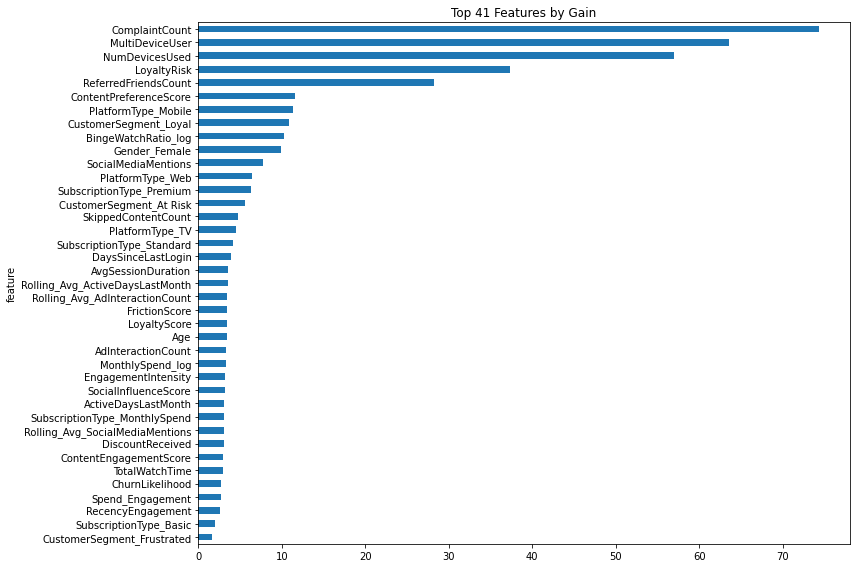

In [176]:
# Train the final model
final_model = XGBClassifier(eval_metric='logloss')  # Optionally specify eval_metric
final_model.fit(X_train_final, y_train)

# Predictions
train_pred = final_model.predict(X_train_final)
test_pred = final_model.predict(X_test_final)

# Test set accuracy
test_accuracy = final_model.score(X_test_final, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Feature Importance by Gain
print("\nFeature Importance (Gain)")
booster = final_model.get_booster()
feature_important = booster.get_score(importance_type="gain")

# Convert to DataFrame
importance_df = pd.DataFrame.from_dict(feature_important, orient='index', columns=['score'])
importance_df.index.name = 'feature'
importance_df.reset_index(inplace=True)
importance_df = importance_df.sort_values(by='score', ascending=False)

# Plot top 20 features
top_n = X_train_final.shape[1]
importance_df.head(top_n).plot(kind='barh', x='feature', y='score', figsize=(12, 8), legend=False)
plt.title(f"Top {top_n} Features by Gain")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [177]:
importance_df

,feature,score
2,ComplaintCount,74.319435
23,MultiDeviceUser,63.586338
5,NumDevicesUsed,57.022884
28,LoyaltyRisk,37.382969
12,ReferredFriendsCount,28.278181
6,ContentPreferenceScore,11.550832
33,PlatformType_Mobile,11.387060
38,CustomerSegment_Loyal,10.898079
15,BingeWatchRatio_log,10.243587
29,Gender_Female,9.931295


Usually, we can simply drop features with gain less than 2. But I prefer dropping them one by one from the least important to see how the model performs — that would be a more solid approach, especially since we have only 41 features.

In [181]:
features_sorted = importance_df.sort_values(by='score', ascending=False)
features_sorted = features_sorted['feature'].tolist()
results = []

for i in range(len(features_sorted), 0, -1):
    selected_features = features_sorted[:i]
    
    X_train_sel = X_train_final[selected_features]
    X_test_sel = X_test_final[selected_features]
    
    model = GradientBoostingClassifier()
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    
    results.append({
        'num_features': i,
        'features_dropped':selected_features,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)


/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/fpd_env/lib/python3.8/site-

In [183]:
results_df.sort_values(by='f1',ascending=False)

,num_features,features_dropped,accuracy,precision,recall,f1
29,10,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8395,0.841121,0.228426,0.359281
30,9,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8395,0.847619,0.225888,0.356713
27,12,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8390,0.839623,0.225888,0.356000
5,34,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8375,0.834951,0.218274,0.346076
25,14,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8370,0.833333,0.215736,0.342742
14,25,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8380,0.857143,0.213198,0.341463
18,21,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8375,0.848485,0.213198,0.340771
1,38,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8370,0.840000,0.213198,0.340081
0,39,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8370,0.840000,0.213198,0.340081
2,37,"[ComplaintCount, MultiDeviceUser, NumDevicesUs...",0.8370,0.840000,0.213198,0.340081


In [185]:
results_df_1 = results_df[results_df['num_features']==10]

In [188]:
results_df_1['features_dropped'].values

array([list(['ComplaintCount', 'MultiDeviceUser', 'NumDevicesUsed', 'LoyaltyRisk', 'ReferredFriendsCount', 'ContentPreferenceScore', 'PlatformType_Mobile', 'CustomerSegment_Loyal', 'BingeWatchRatio_log', 'Gender_Female'])],
      dtype=object)

In [191]:
results = {}
X_train_sel = X_train_final
X_test_sel = X_test_final
    
model = GradientBoostingClassifier()
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)
results ={
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }


In [192]:
results

{'accuracy': 0.837,
 'precision': 0.84,
 'recall': 0.2131979695431472,
 'f1': 0.340080971659919}

In [193]:
results = {}
X_train_sel = X_train_final[['ComplaintCount', 'MultiDeviceUser', 'NumDevicesUsed', 'LoyaltyRisk', 'ReferredFriendsCount', 'ContentPreferenceScore', 'PlatformType_Mobile', 'CustomerSegment_Loyal', 'BingeWatchRatio_log', 'Gender_Female']]
X_test_sel = X_test_final[['ComplaintCount', 'MultiDeviceUser', 'NumDevicesUsed', 'LoyaltyRisk', 'ReferredFriendsCount', 'ContentPreferenceScore', 'PlatformType_Mobile', 'CustomerSegment_Loyal', 'BingeWatchRatio_log', 'Gender_Female']]
    
model = GradientBoostingClassifier()
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)
results ={
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }


In [194]:
results

{'accuracy': 0.8395,
 'precision': 0.8411214953271028,
 'recall': 0.22842639593908629,
 'f1': 0.3592814371257485}

### Create Simpler models with less but more important features

So Now with these 10 features we could Gain similar performance. So i will stick with these.

ComplaintCount

MultiDeviceUser

NumDevicesUsed

LoyaltyRisk

ReferredFriendsCount

ContentPreferenceScore

PlatformType_Mobile

CustomerSegment_Loyal

BingeWatchRatio_log

Gender

In [196]:
X_train_sel = X_train_final[['ComplaintCount', 'MultiDeviceUser', 'NumDevicesUsed', 'LoyaltyRisk', 'ReferredFriendsCount', 'ContentPreferenceScore', 'PlatformType_Mobile', 'CustomerSegment_Loyal', 'BingeWatchRatio_log', 'Gender_Female']]
X_test_sel = X_test_final[['ComplaintCount', 'MultiDeviceUser', 'NumDevicesUsed', 'LoyaltyRisk', 'ReferredFriendsCount', 'ContentPreferenceScore', 'PlatformType_Mobile', 'CustomerSegment_Loyal', 'BingeWatchRatio_log', 'Gender_Female']]
    
final_model = GradientBoostingClassifier()
final_model.fit(X_train_sel, y_train)
y_pred = final_model.predict(X_test_sel)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


0.8395
0.8411214953271028
0.22842639593908629
0.3592814371257485


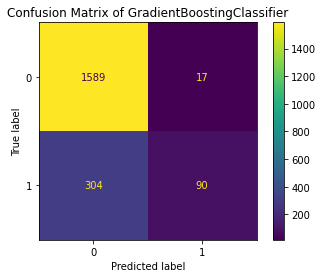

In [198]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.title('Confusion Matrix of GradientBoostingClassifier')
plt.show()

This looks good because the diagonal has high value of this matrix.

True Negatives (TN): 1589 — These are the correct predictions where the model predicted the negative class (e.g., no churn) and the actual class was negative.

False Positives (FP): 17 — These are the incorrect predictions where the model predicted the positive class (e.g., churn) but the actual class was negative.

False Negatives (FN): 304 — These are the incorrect predictions where the model predicted the negative class (e.g., no churn) but the actual class was positive.

True Positives (TP): 90 — These are the correct predictions where the model predicted the positive class (e.g., churn) and the actual class was positive.

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GradientBoostingClassifier
model = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_sel, y_train)

# Get the best parameters and model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_sel)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Print best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Accuracy: 0.84
Precision: 0.8425925925925926
Recall: 0.23096446700507614
F1 Score: 0.36254980079681276
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 1.0}


In [200]:
# Use the best parameters from GridSearchCV
final_model = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    min_samples_split=10,
    n_estimators=150,
    subsample=1.0
)

# Train the model
final_model.fit(X_train_sel, y_train)

# Predict on test data
y_pred = final_model.predict(X_test_sel)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.84
Precision: 0.8425925925925926
Recall: 0.23096446700507614
F1 Score: 0.36254980079681276


In [201]:
#save the model
pickle.dump(final_model,open('churn_prediction_model.pkl','wb'))

In [202]:
# Make predictions on the test set
y_pred = final_model.predict(X_test_sel)

### What influences churn the most?

#### High Complaint Volume:
Customers who frequently raise complaints are likely experiencing frustration with the service — whether it's content quality, app performance, or customer support. This dissatisfaction is a strong predictor of churn.

#### Limited Device Usage:
Users accessing the platform through fewer devices (e.g., only one screen) may not be fully engaged or integrated into the platform’s ecosystem. This lower touchpoint variety often signals weaker platform dependence and higher churn risk.

#### High Loyalty Risk Score (Composite Metric):
Users flagged with high LoyaltyRisk — based on excessive discount reliance, frequent complaints, and low loyalty score — are typically opportunistic or disengaged. These users tend to leave once incentives stop, making them high-risk.

#### Mobile-Only Users:
Customers primarily using mobile devices tend to churn more frequently. This may point to challenges in mobile UX, content accessibility, or limited engagement time compared to desktop or TV viewers.

#### Low Binge-Watching Ratio:
Customers who rarely binge-watch may not find the content compelling or suited to their interests. This lower consumption intensity is a subtle but telling sign of reduced platform loyalty.

#### Female Users:
Gender analysis showed higher churn propensity among female users in this dataset. This could relate to unmet content preferences, feature usage patterns, or marketing disconnects that warrant deeper user research.

### Customer Segmentation (Who is most at risk?)

#### Disengaged & Frustrated
Customers who frequently raise complaints and have a low loyalty score (as captured by the LoyaltyRisk feature) are highly dissatisfied and opportunistic.

#### Low-Engagement Mobile Users
Users who access the platform only via mobile and have low binge-watch ratios or session durations. These users may be struggling with the mobile experience or not finding the content compelling.

#### Unengaged Low-Touch Users
Customers using only 1–2 devices and having a low ContentPreferenceScore may not be deeply engaged or feel the platform is personalized to them.

#### Deal Seekers
Users with high discount usage and referral activity, but low retention, likely stay only for short-term benefits.

#### Under-Served Female Audience
If female users are showing systematically higher churn (as per model), this could indicate gaps in content targeting or platform experience for this demographic. Have to see what difference this segment facing comparing Gender Male.

### Retention Strategies: What Should We Do?

#### Address High-Complaint, Low-Loyalty Customers

Proactively engage users with high complaint counts through customer support follow-ups.

Offer targeted incentives post-resolution (e.g., limited-time free upgrades or loyalty bonuses).

Focus on improving friction points in the user journey.

#### Improve Mobile User Engagement

Optimize the mobile app experience for usability and performance.

Use personalized push notifications to highlight relevant content.

Encourage longer and more frequent mobile sessions through better content discovery.

#### Re-engage Low-Touch Users

Promote the benefits of using the platform across multiple devices.

Use behavioral data to enhance content recommendations and surface personalized suggestions.

Offer onboarding tips or reminders to improve feature awareness.

#### Reposition Discounts for Value Alignment

Transition from broad discounting to loyalty-based rewards and engagement-driven benefits.

Implement tiered loyalty programs to encourage sustained platform usage.

Identify users abusing discounts and offer them value-based alternatives.

#### Tailor Experience for Female Users

Analyze female audience preferences and consumption patterns.

Customize recommendations and user interface experiences to reflect their interests.

Ensure content curation and platform messaging resonate with this segment.